In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("gcar_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   brand                     100000 non-null  object 
 2   model                     100000 non-null  object 
 3   color                     99924 non-null   object 
 4   registration_date         99999 non-null   object 
 5   year                      100000 non-null  object 
 6   price_in_euro             100000 non-null  object 
 7   power_kw                  99925 non-null   object 
 8   power_ps                  99928 non-null   object 
 9   transmission_type         100000 non-null  object 
 10  fuel_type                 100000 non-null  object 
 11  fuel_consumption_l_100km  88761 non-null   object 
 12  fuel_consumption_g_km     100000 non-null  object 
 13  mileage_in_km             99932 non-null   fl

In [ ]:
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(' l/100 km', '', regex=False)
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].str.replace(',', '.', regex=False)
# regex=False untuk menghindari interpretasi 'l/100 km' sebagai ekspresi reguler.

df['fuel_consumption_l_100km'] = pd.to_numeric(df['fuel_consumption_l_100km'], errors='coerce')

# Menghapus baris yang memiliki NaN di kolom 'fuel_consumption_l_100km'
df = df.dropna(subset=['fuel_consumption_l_100km'])

# Jika Anda ingin mengubah kolom tersebut menjadi float setelah menghapus NaN
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87982 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                87982 non-null  int64  
 1   brand                     87982 non-null  object 
 2   model                     87982 non-null  object 
 3   color                     87912 non-null  object 
 4   registration_date         87982 non-null  object 
 5   year                      87982 non-null  object 
 6   price_in_euro             87982 non-null  object 
 7   power_kw                  87939 non-null  object 
 8   power_ps                  87939 non-null  object 
 9   transmission_type         87982 non-null  object 
 10  fuel_type                 87982 non-null  object 
 11  fuel_consumption_l_100km  87982 non-null  float64
 12  fuel_consumption_g_km     87982 non-null  object 
 13  mileage_in_km             87933 non-null  float64
 14  offer_descr

<ipython-input-3-bc9a51248cf2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype(float)


In [ ]:
random_sample = df.sample(n=475, random_state=42)
random_sample.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
30365,60433,ford,Ford B-Max,bronze,12/2012,2012,8999,74,101,Manual,Petrol,4.9,- (g/km),59500.0,1.0 EcoBoost Titanium Sync Edition
39750,20297,audi,Audi A3,silver,05/2021,2021,28950,110,150,Automatic,Diesel,4.5,121 g/km,46500.0,Sportback 35 TDI S-tronic NAVI STANDHZ LED
64378,88682,kia,Kia Venga,silver,04/2016,2016,13750,92,125,Automatic,Petrol,6.5,- (g/km),38000.0,Venga 1.6 CVVT Automatik Platinum Edition
98437,40998,bmw,BMW 330,white,03/2020,2020,35900,195,265,Automatic,Diesel,5.4,141 g/km,96600.0,"330D Tour.xDrive M-Sport SAG,Navig.Prof,Abstan..."
27259,15134,audi,Audi A4,grey,03/2018,2018,18499,140,190,Automatic,Petrol,6.1,139 g/km,171000.0,TFSI 2x S line AHK/LED/VIRTUAL/ACC/SHZ


In [ ]:
# testing insertion sort rekursif
def recursive_insertion_sort(random_sample, n=None):
    if n is None:
        n = len(random_sample)

    # Basis rekursi: jika hanya ada satu elemen, sudah terurut
    if n <= 1:
        return

    # Rekursi untuk mengurutkan n-1 elemen pertama
    recursive_insertion_sort(random_sample, n - 1)

    # Sisipkan elemen terakhir ke posisi yang benar
    key = random_sample.iloc[n - 1]
    j = n - 2

    # Geser elemen yang lebih boros ke kanan
    while j >= 0 and random_sample.iloc[j]['fuel_consumption_l_100km'] > key['fuel_consumption_l_100km']:
        random_sample.iloc[j + 1] = random_sample.iloc[j]
        j -= 1

    # Masukkan elemen pada posisi yang tepat
    random_sample.iloc[j + 1] = key


print("Sebelum sorting:")
print(random_sample[['model', 'fuel_consumption_l_100km']])

# Sortir mobil berdasarkan efisiensi BBM
recursive_insertion_sort(random_sample)

print("\nSetelah sorting (paling irit ke paling boros):")
print(random_sample[['model', 'fuel_consumption_l_100km']])


Sebelum sorting:
               model  fuel_consumption_l_100km
30365     Ford B-Max                       4.9
39750        Audi A3                       4.5
64378      Kia Venga                       6.5
98437        BMW 330                       5.4
27259        Audi A4                       6.1
...              ...                       ...
51589      Fiat 500L                       4.8
18583    Dacia Lodgy                       6.7
44832   Ford Mustang                       8.0
63020      Ford Puma                       4.3
23191  Citroen Jumpy                       5.6

[475 rows x 2 columns]

Setelah sorting (paling irit ke paling boros):
                        model  fuel_consumption_l_100km
30365                 Audi Q5                       0.4
39750               Ford Kuga                       1.2
64378                 Audi A6                       1.5
98437                 BMW 330                       1.7
27259                 BMW 225                       1.9
...        

In [ ]:
# testing insertion sort iteratif
def insertion_sort_mobil(random_sample):
    n = len(random_sample)
    for i in range(1, n):
        key = random_sample.iloc[i]  # Mobil yang sedang disortir
        j = i - 1
        # Geser elemen yang lebih boros ke kanan
        while j >= 0 and random_sample.iloc[j]['fuel_consumption_l_100km'] > key['fuel_consumption_l_100km']:
            random_sample.iloc[j + 1] = random_sample.iloc[j]
            j -= 1
        # Masukkan mobil di posisi yang tepat
        random_sample.iloc[j + 1] = key

print("Sebelum sorting:")
print(random_sample[['model', 'fuel_consumption_l_100km']])

# Sortir mobil berdasarkan efisiensi BBM
insertion_sort_mobil(random_sample)

print("\nSetelah sorting (paling irit ke paling boros):")
print(random_sample[['model', 'fuel_consumption_l_100km']])

Sebelum sorting:
                        model  fuel_consumption_l_100km
30365                 Audi Q5                       0.4
39750               Ford Kuga                       1.2
64378                 Audi A6                       1.5
98437                 BMW 330                       1.7
27259                 BMW 225                       1.9
...                       ...                       ...
51589                 Audi R8                      13.9
18583                  BMW Z8                      14.5
44832  Bentley Continental GT                      14.5
63020             Ferrari 812                      15.0
23191               Dodge RAM                      15.3

[475 rows x 2 columns]

Setelah sorting (paling irit ke paling boros):
                        model  fuel_consumption_l_100km
30365                 Audi Q5                       0.4
39750               Ford Kuga                       1.2
64378                 Audi A6                       1.5
98437          

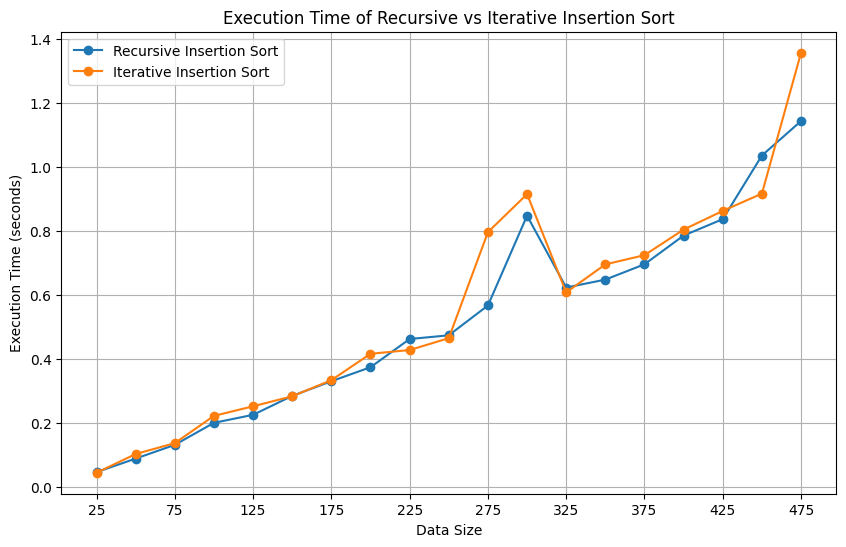

Total waktu Recursive Insertion Sort: 8.67117 detik
Total waktu Iterative Insertion Sort: 9.02082 detik


In [ ]:
# Simulate the data
np.random.seed(0)
models = [f"Model_{i}" for i in range(1, 1001)]
fuel_consumption = np.random.uniform(5, 15, 1000)  # Random fuel consumption between 5 and 15


# Function to time the sorting process
def time_insertion_sort(data, sorting_function):
    start_time = time.time()
    sorting_function(data)
    end_time = time.time()
    return end_time - start_time

# Recursive Insertion Sort
def recursive_insertion_sort(random_sample, n=None):
    if n is None:
        n = len(random_sample)

    if n <= 1:
        return

    recursive_insertion_sort(random_sample, n - 1)
    key = random_sample.iloc[n - 1]
    j = n - 2
    while j >= 0 and random_sample.iloc[j]['fuel_consumption_l_100km'] > key['fuel_consumption_l_100km']:
        random_sample.iloc[j + 1] = random_sample.iloc[j]
        j -= 1
    random_sample.iloc[j + 1] = key

# Iterative Insertion Sort
def iterative_insertion_sort(random_sample):
    n = len(random_sample)
    for i in range(1, n):
        key = random_sample.iloc[i]
        j = i - 1
        while j >= 0 and random_sample.iloc[j]['fuel_consumption_l_100km'] > key['fuel_consumption_l_100km']:
            random_sample.iloc[j + 1] = random_sample.iloc[j]
            j -= 1
        random_sample.iloc[j + 1] = key

# Measure execution times for different data sizes
data_sizes = range(25, 476, 25)
recursive_times = []
iterative_times = []

for size in data_sizes:
    subset = random_sample.head(size)
    total_recursive_time = sum(recursive_times)
    total_iterative_time = sum(iterative_times)
    # Time recursive insertion sort
    recursive_time = time_insertion_sort(subset.copy(), recursive_insertion_sort)
    recursive_times.append(recursive_time)

    # Time iterative insertion sort
    iterative_time = time_insertion_sort(subset.copy(), iterative_insertion_sort)
    iterative_times.append(iterative_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, recursive_times, label='Recursive Insertion Sort', marker='o')
plt.plot(data_sizes, iterative_times, label='Iterative Insertion Sort', marker='o')
plt.xlabel('Data Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of Recursive vs Iterative Insertion Sort')
plt.xticks(range(25, 476, 50))
plt.legend()
plt.grid(True)
plt.show()
print(f"Total waktu Recursive Insertion Sort: {total_recursive_time:.5f} detik")
print(f"Total waktu Iterative Insertion Sort: {total_iterative_time:.5f} detik")
